<a href="https://colab.research.google.com/github/mohamedOabdelgawad/Julia-PlutoOnColab-/blob/main/JuliaAndPlutoOnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google Drive**
Please note that you will need to store your Pluto.jl files on ur dive
this is a virtual machine that is not intended to recognize your local drive at all

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Install pyngrok**

In [ ]:
# !pip install tornado==5.1
# Install jupyterlab and ngrok
!pip install jupyterlab pyngrok -q

# Run jupyterlab in background
!nohup jupyter lab --ip=0.0.0.0 &

# Make jupyterlab accessible via ngrok
from pyngrok import ngrok
print(ngrok.connect(8888))

# **Install colab_ssh**

this lib is responsible on openning ssh tunnel that we will use to connect to this virtual machine

In [3]:
# Install colab_ssh on google colab
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared


## Creating the ssh Connection

*  please if this is your first time using cloudflared follow the     section Client machine configuration
*   no replace "\<add ur password\>" with the your password
*   we will need the ssh terminal command later on so please copy it somewhere



In [4]:
launch_ssh_cloudflared(password="password$$")

# **Install Julia**

here we install julia to the vertial machine
I use version 1.5 as I think it is the most stable version 
some people my get strange errors with version 1.6
If you feel the need to upgrade just replace the link in the wget command with the version you want but you need to reset your runtime env

In [5]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.4-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
# enable this line if you want to run julia insede Colab but you will be using jupyter instead
# this works better with Julia version 1.6
# don't run the below section if you want to run in colab notebook (jupyter)
# julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

## Install Pluto

we are almost there don't give up! :)

1.   replace 1234 with your prefared port number
2.   now we connect our pc to colab using the following command in **CMD**


> *  the command we copied from ssh terminal section then add port forwording via the port we added in the bellow cell -L port:localhost:port

> *   exmaple:**ssh standing-threatened-concern-comments.trycloudflare.com -L 1234:localhost:1234**

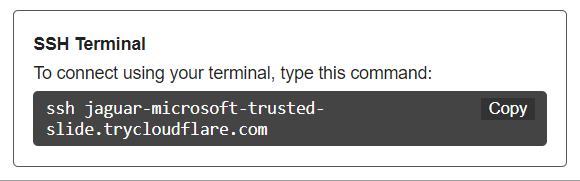



3.   it will ask you to add sha to authorized keys type yes
4.   it will ask for password type the password you add in this [cell](https://colab.research.google.com/drive/1TjOraI4d4on--W3TNppq5v6K8oyjgKu3#scrollTo=XtiJlL62lbHK&line=1&uniqifier=1)

5.   in the below cell's log a linke will appear with use this link to access **Pluto**
you should find the link like the image below
 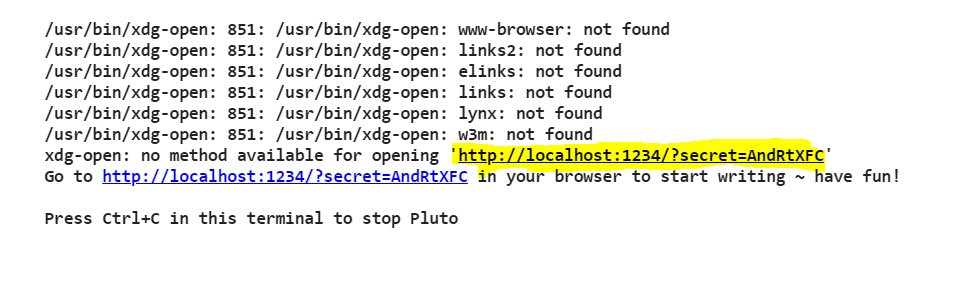

In [ ]:
!julia -e 'using Pkg; pkg"add Pluto;"'
!julia -e 'using Pluto;Pluto.run(port=1234);'